In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets.california_housing import fetch_california_housing
df=fetch_california_housing()
print(df.keys)

<built-in method keys of Bunch object at 0x00000203ADB6F360>


In [2]:
df.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [3]:
type(df)

sklearn.utils.Bunch

In [4]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [5]:
df.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
df.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

In [7]:
df.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [8]:
df1= pd.DataFrame(df.data,columns=df.feature_names)
 

In [9]:
df1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
df2= pd.DataFrame(df.target,columns=["price"])

In [11]:
df2.head()

,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [12]:
df1.shape

(20640, 8)

In [13]:
df2.shape

(20640, 1)

In [14]:
df1.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [15]:
df2.isnull().sum()

price    0
dtype: int64

In [16]:
df3=pd.concat([df1, df2],axis=1) 
df3
#adding the price and data to analyse

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


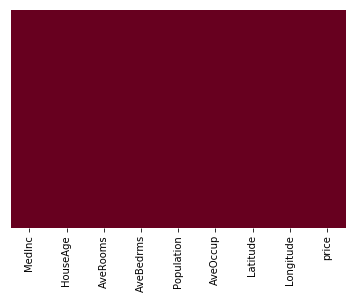

In [17]:
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False,cmap="RdBu")

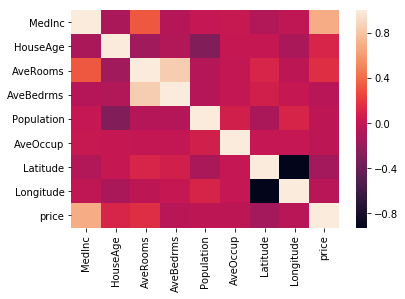

In [18]:
sns.heatmap(df3.corr())
#as seen the highest price seen belongs to medlic


In [19]:
df1_train,df1_test,df2_train,df2_test=train_test_split(df1,df2,test_size=0.3,random_state=43)

In [20]:
df1_test.shape

(6192, 8)

In [21]:
df2_train.shape

(14448, 1)

In [22]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [23]:
LR.fit(df1_train,df2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
pred=LR.predict(df1_test)

In [40]:
len(pred)

6192

In [27]:
#gives the coefficient
print(LR.coef_)

[[ 4.25666037e-01  8.97438081e-03 -8.76560772e-02  5.48630891e-01
  -7.06776544e-06 -3.61695364e-03 -4.40658652e-01 -4.51982812e-01]]


In [28]:
#gives the intercept
print(LR.intercept_)

[-38.27973116]


In [29]:
from sklearn.metrics import r2_score,adjusted_rand_score

In [30]:
#calculating accuracy
r_squared=r2_score(pred,df2_test)
r_squared

0.39826131827076694

In [31]:
df1_train,df1_test,df2_train,df2_test = train_test_split(df1,df2,test_size=0.10,random_state=42,shuffle=True)


In [32]:
df1_test.shape

(2064, 8)

In [33]:
df2_train.shape

(18576, 1)

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
PR = PolynomialFeatures()

In [46]:
k=PR.fit_transform(df1_train)

In [47]:
PR.fit(k,df2_train)
LR.fit(k,df2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
l=LR.predict(k)

In [57]:
from sklearn.metrics import r2_score,adjusted_rand_score


ValueError: Found input variables with inconsistent numbers of samples: [18576, 2064]